In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

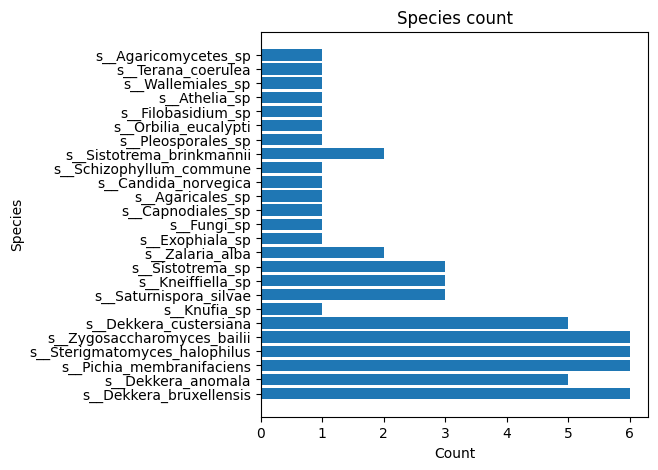

In [2]:
df = pd.read_csv('doppelbock.csv')
columns = []
for col in df.columns:
    c = col.split(";")
    if c[-1] != '__' and c[0]=='k__Fungi':
        columns.append(col)

# print(columns)
df = df.filter(columns)

non_zero_cells = df[df != 0.0].count()

import matplotlib.pyplot as plt

# Create a list of species names and counts
species_names = [label.split(';')[-1].strip() for label in non_zero_cells.index.tolist()]
counts = non_zero_cells.tolist()

# Set up the plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.barh(species_names, counts)

# Set the labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Species')
ax.set_title('Species count')

# Display the plot
plt.show()

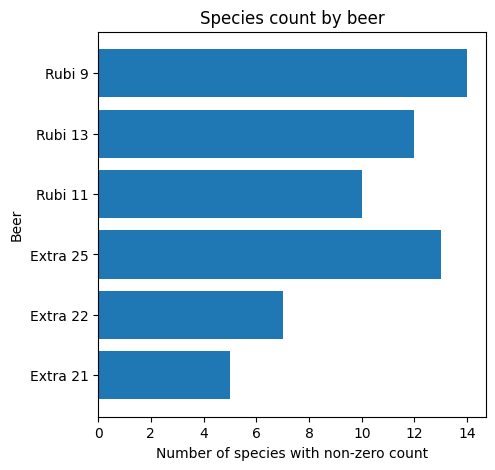

In [3]:
df = pd.read_csv('doppelbock.csv')
columns = []
for col in df.columns:
    c = col.split(";")
    if c[-1] != '__' and (c[0]=='k__Fungi' or c[0]=='beer_id'):
        columns.append(col)

# print(columns)
df = df.filter(columns)

# Group the data by beer and sum the non-zero counts
grouped_df = df.groupby('beer_id').sum()
grouped_df['non_zero_count'] = (grouped_df > 0).sum(axis=1)

# Create a horizontal bar plot of non-zero counts by beer
fig, ax = plt.subplots(figsize=(5, 5))
ax.barh(grouped_df.index, grouped_df['non_zero_count'])

# Set the labels and title
ax.set_xlabel('Number of species with non-zero count')
ax.set_ylabel('Beer')
ax.set_title('Species count by beer')

# Set the x-axis ticks to show only integers
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Display the plot
plt.show()

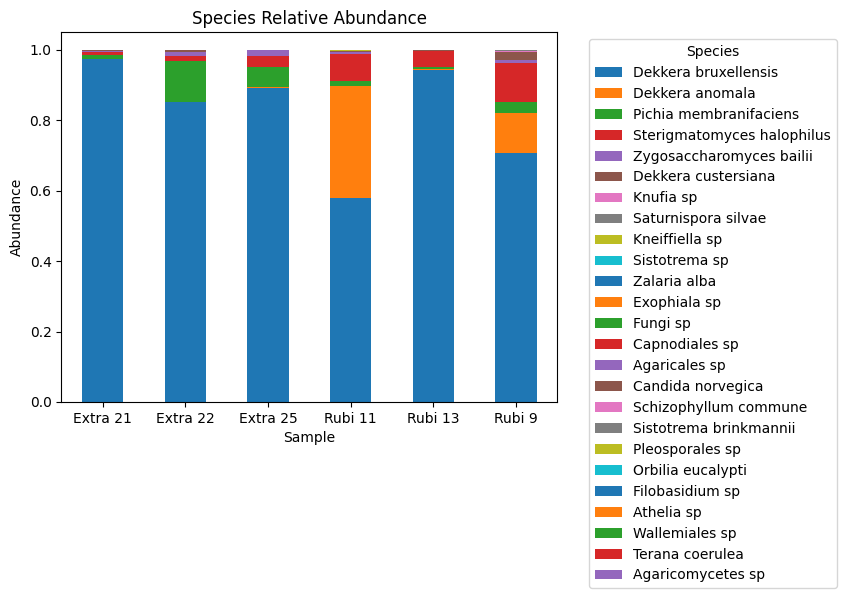

In [4]:
df = pd.read_csv('doppelbock.csv')
columns = []
for col in df.columns:
    c = col.split(";")
    if c[-1] != '__' and (c[0]=='k__Fungi' or c[0]=='beer_id'):
        columns.append(col)

# print(columns)
df = df.filter(columns)
new_columns = []
for label in df.columns.tolist():
    if label != 'beer_id':
        new_columns.append(label.split(';')[-1].strip()[3:].replace('_', ' '))
    else:
        new_columns.append('beer_id')

df.columns = new_columns

# Group the data by beer and sum the non-zero counts
grouped_df = df.groupby('beer_id').sum()

# Normalize the data to get relative abundance
normalized_df = grouped_df.div(grouped_df.sum(axis=1), axis=0)

# Plot the data
ax = normalized_df.plot.bar(rot=0, stacked=True)

# Set the title and labels
plt.title('Species Relative Abundance')
plt.ylabel('Abundance')
plt.xlabel('Sample')

# Place the legend to the right of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Species")

# Show the plot
plt.show()
